<a href="https://colab.research.google.com/github/svfrolov/YP-project/blob/main/%E2%84%967_%D0%9E%D1%82%D1%82%D0%BE%D0%BA_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.


Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 


Постройте модель с предельно большим значением `F1-меры`. Чтобы сдать проект успешно, нужно довести метрику до `0.59`. Проверьте `F1-меру` на тестовой выборке самостоятельно.


**Дополнительно измеряйте `AUC-ROC`, сравнивайте её значение с `F1-мерой`.**

# Инструкция по выполнению проекта

1. Загрузите и подготовьте данные. Поясните порядок действий.


2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.


3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.


4. Проведите финальное тестирование.

# Описание данных

Данные находятся в файле `/datasets/Churn.csv` (англ. «отток клиентов»).

**Признаки**

* RowNumber — индекс строки в данных


* CustomerId — уникальный идентификатор клиента


* Surname — фамилия


* CreditScore — кредитный рейтинг


* Geography — страна проживания


* Gender — пол


* Age — возраст


* Tenure — сколько лет человек является клиентом банка


* Balance — баланс на счёте


* NumOfProducts — количество продуктов банка, используемых клиентом


* HasCrCard — наличие кредитной карты


* IsActiveMember — активность клиента

* EstimatedSalary — предполагаемая зарплата

# Целевой признак

`Exited` — факт ухода клиента

## Подготовка данных

Инструкция по выполнению проекта
Загрузите и подготовьте данные. Поясните порядок действий.
Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
Проведите финальное тестирование.
Описание данных
Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»). Скачать датасет


**Смотрим признаки**

**можно удалить**
RowNumber — индекс строки в данных

**можно удалить**
CustomerId — уникальный идентификатор клиента

**можно удалить**
Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

**можно удалить**
EstimatedSalary — предполагаемая зарплата

Целевой признак
Exited — факт ухода клиента

**можно удалить данные, которые явно не влияют на целевой признак Exited клиентов**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
RANDOM_SEED = 54

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
rew = ['RowNumber', 'CustomerId', 'Surname', 'EstimatedSalary']
df = df.drop(rew, axis=1)

**удалили данные, которые не влияют на целевой признак**

In [ ]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          9091 non-null   float64
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCrCard       10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
 9   Exited          10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,0
2,502,France,Female,42,8.0,159660.80,3,1,0,1
3,699,France,Female,39,1.0,0.00,2,0,0,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,1
6,822,France,Male,50,7.0,0.00,2,1,1,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,1
8,501,France,Male,44,4.0,142051.07,2,0,1,0
9,684,France,Male,27,2.0,134603.88,1,1,1,0


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


**пропусков нет** данные полные, исключение "**Tenure** — сколько лет человек является клиентом банка" (пропуски связаны вероятно с тем, что клиент новый)

In [ ]:
df['Tenure'] = df['Tenure'].fillna(0).astype('int64')

заполнили нолем

## Исследование задачи

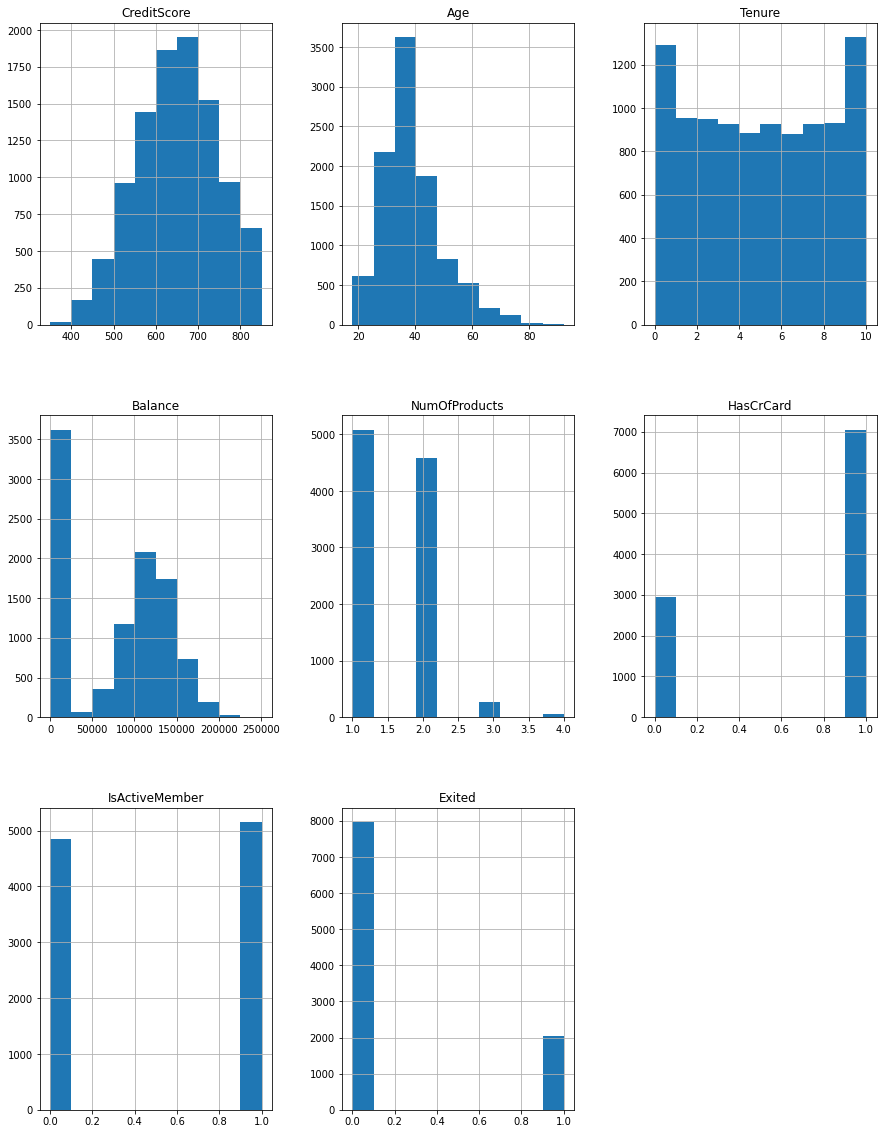

In [ ]:
df.hist(figsize=(15, 20));

часть не держит денег на балансе, в банке 4 продукта, кридитки у большинства, активных поровну, в **Exited** видно, что ушло порядка 20%

In [ ]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CreditScore,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.027094
Age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,0.285323
Tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,-0.013319
Balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.118533
NumOfProducts,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.156128
Exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,1.000000


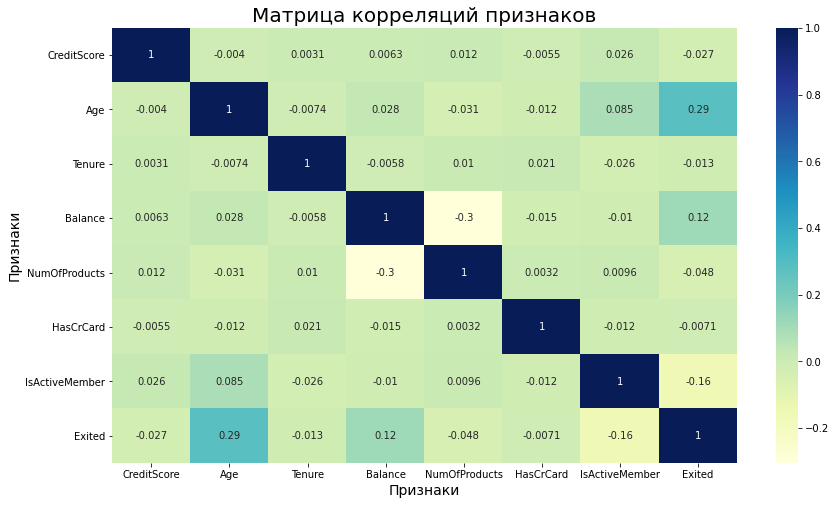

In [ ]:
matr = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matr, annot = True, cmap="YlGnBu", square=False)
plt.title('Матрица корреляций признаков', fontsize = 20)
plt.xlabel('Признаки', fontsize = 14) # x-axis label with fontsize 15
plt.ylabel('Признаки', fontsize = 14) # y-axis label with fontsize 15
plt.show()

Явной корреляции с **Exited** не наблюдается

<AxesSubplot:title={'center':'сколько лет является клиентом'}, xlabel='Tenure'>

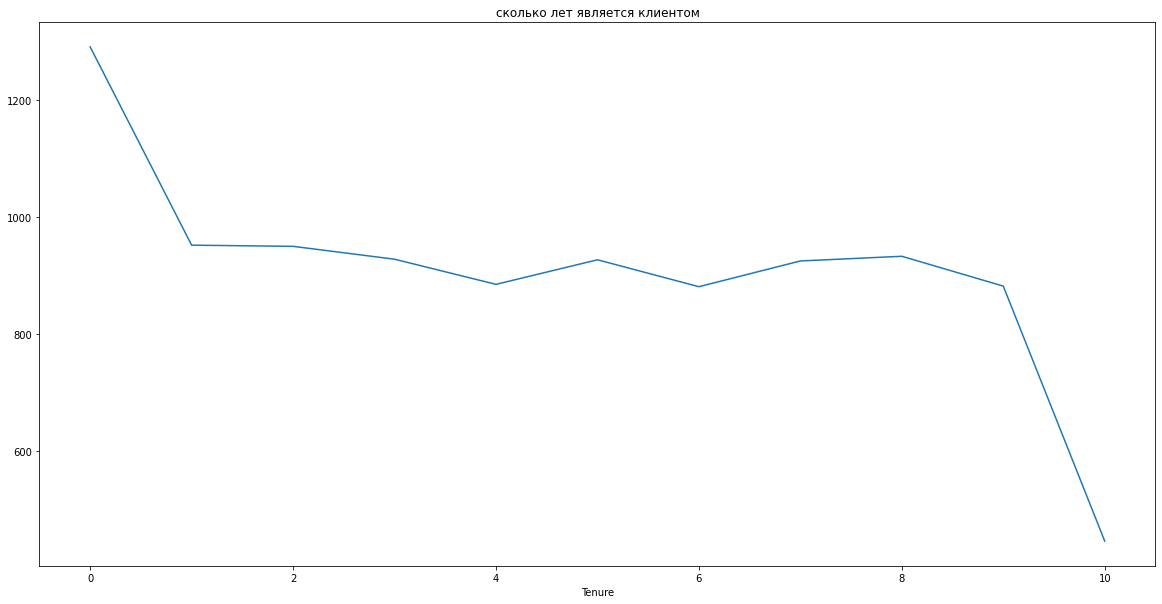

In [ ]:
df.groupby('Tenure')['Exited'].count().plot(figsize=(20,10), title="сколько лет является клиентом")

около 10 лет клиенты остаются в банке

<AxesSubplot:title={'center':'Возраст'}, xlabel='Age'>

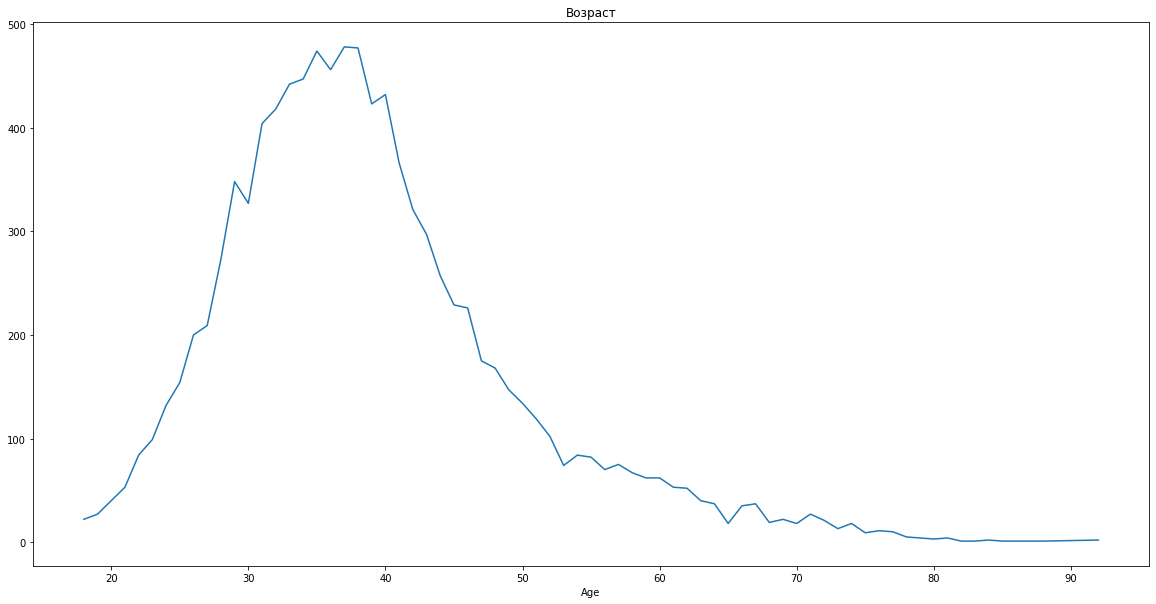

In [ ]:
df.groupby('Age')['Exited'].count().plot(figsize=(20,10), title="Возраст")

судя по грайику основной отток от 25-55, скорее всего как и везде, самый активный возраст, хотя в тот же момент клиенты являются постоянными около 10 лет

<AxesSubplot:title={'center':'Баланс на счете'}, xlabel='Exited'>

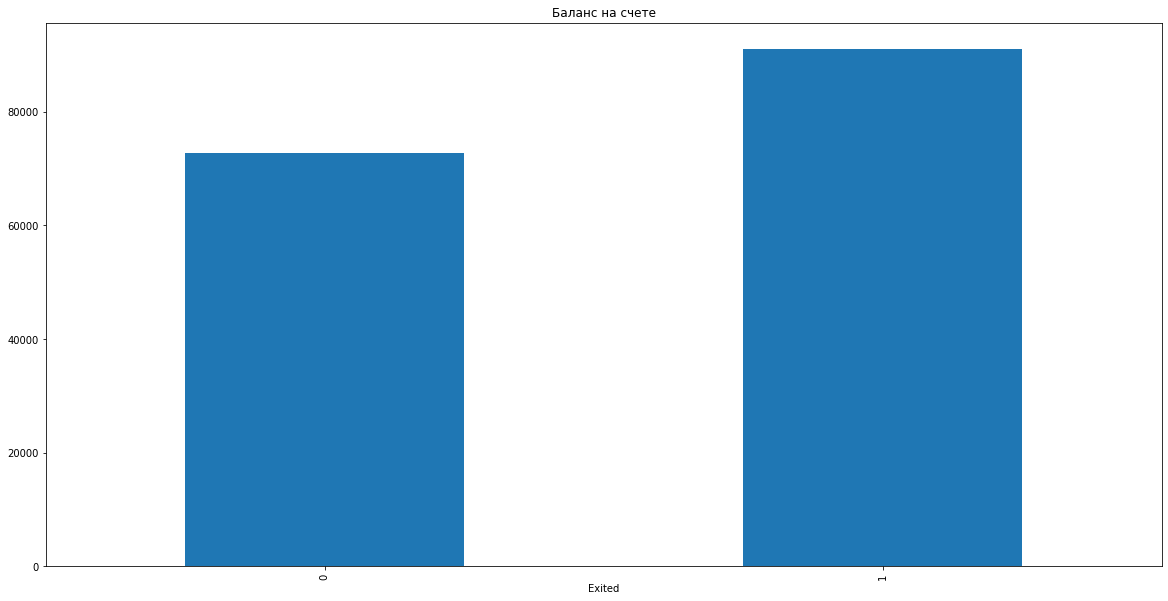

In [ ]:
df.groupby('Exited')['Balance'].mean().plot(figsize=(20,10), title="Баланс на счете", kind='bar')

различие есть, но сильной разницы нет, влияет не существенно, но видно, что уходят клиенты с балансом побольше

<AxesSubplot:title={'center':'Наличие кредитки'}, xlabel='HasCrCard'>

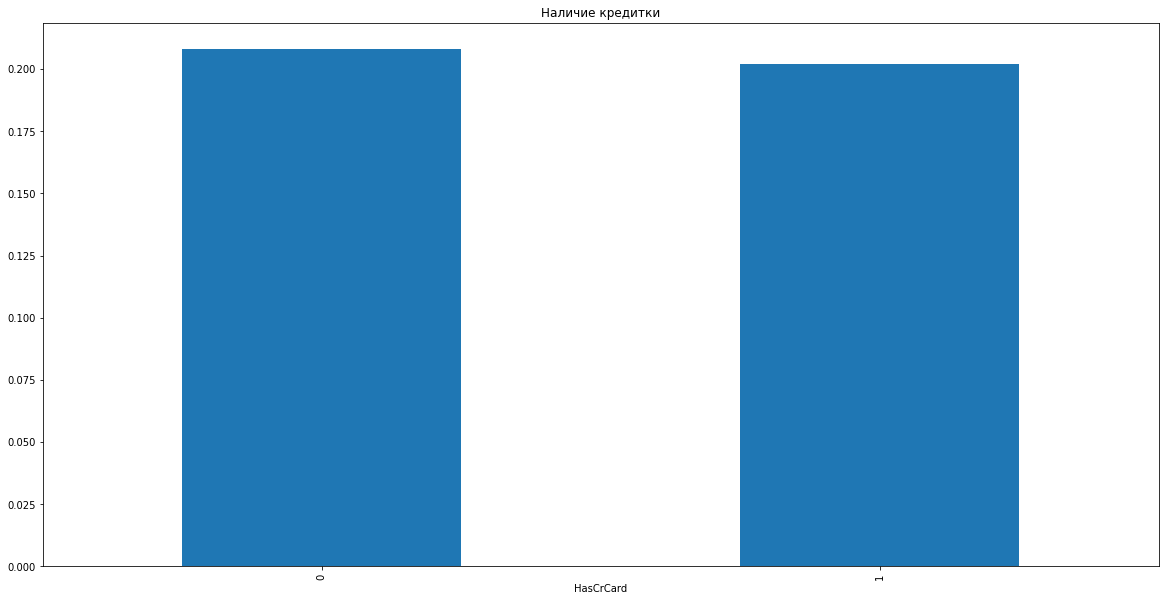

In [ ]:
df.groupby('HasCrCard')['Exited'].mean().plot(figsize=(20,10), title="Наличие кредитки", kind='bar')

наличие кредитки не влияет

<AxesSubplot:title={'center':'Количество продуктов банка'}, xlabel='NumOfProducts'>

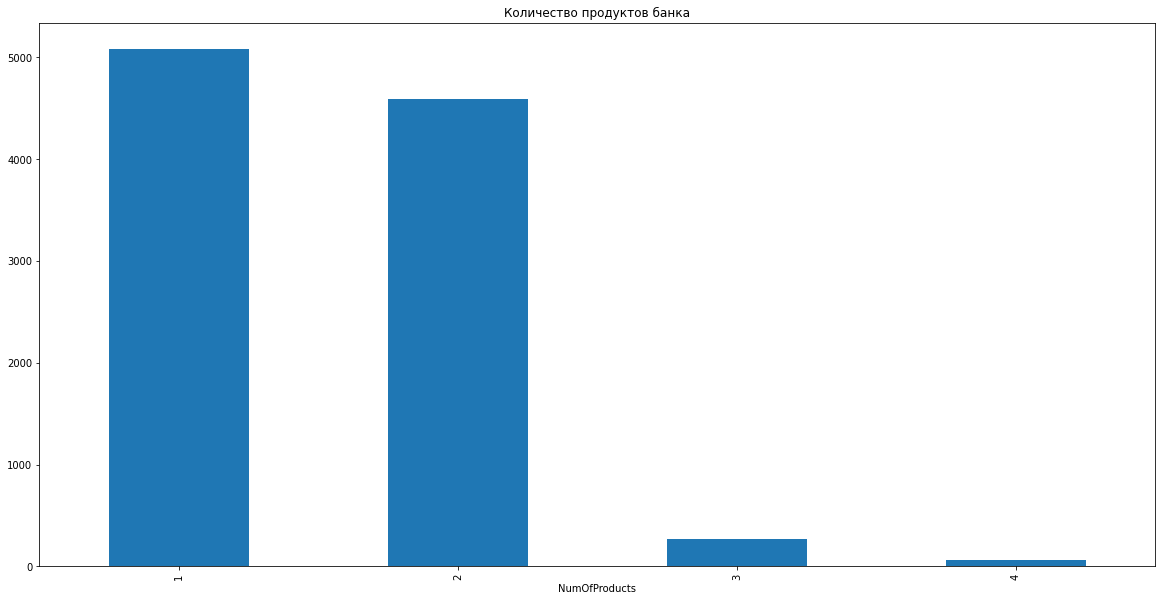

In [ ]:
df.groupby('NumOfProducts')['Exited'].count().plot(figsize=(20,10), title="Количество продуктов банка", kind='bar')

видно что 1-2 продукта большинство

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


In [ ]:
data = pd.get_dummies(df, drop_first=True)

**избавили от категориальных признаков**

In [ ]:
# объявим две переменные

features = data.drop(['Exited'], axis=1)
target = data['Exited']

In [ ]:
#разбиваем данные

(features_train, features_valid, 
 target_train, target_valid) = train_test_split(features, 
                                                target, random_state=RANDOM_SEED, test_size=0.4)

In [ ]:
(features_valid, features_test, 
 target_valid, target_test) = train_test_split(features_valid, 
                                               target_valid, random_state=RANDOM_SEED, test_size=0.5)

In [ ]:
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 10) (2000, 10) (2000, 10)
(6000,) (2000,) (2000,)


Cтандартизация данных с помощью StandardScaler

https://data-scientists.ru/content/masshtabirovanie

In [ ]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

scaler = StandardScaler()

scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric]);
features_valid[numeric] = scaler.transform(features_valid[numeric]);
features_test[numeric] = scaler.transform(features_test[numeric]);

/tmp/ipykernel_298/844510366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric]);
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Размер выборки

In [ ]:
print(features_valid.shape)
print(target_valid.shape)

(2000, 10)
(2000,)


In [ ]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

соотношение 1:4

DecisionTreeClassifier

In [ ]:
for depth in range(1, 32):
	model_dec = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=depth)
	model_dec.fit(features_train, target_train) 
	predictions = model_dec.predict(features_valid)
	print('Значение - maxdepth:', depth, 'F1:', f1_score(predictions, target_valid))

Значение - maxdepth: 1 F1: 0.0
Значение - maxdepth: 2 F1: 0.4939024390243902
Значение - maxdepth: 3 F1: 0.3968871595330739
Значение - maxdepth: 4 F1: 0.5117845117845118
Значение - maxdepth: 5 F1: 0.47299813780260713
Значение - maxdepth: 6 F1: 0.5596026490066226
Значение - maxdepth: 7 F1: 0.5551948051948051
Значение - maxdepth: 8 F1: 0.5941176470588235
Значение - maxdepth: 9 F1: 0.547945205479452
Значение - maxdepth: 10 F1: 0.5633001422475107
Значение - maxdepth: 11 F1: 0.5620542082738944
Значение - maxdepth: 12 F1: 0.5457025920873124
Значение - maxdepth: 13 F1: 0.5459533607681756
Значение - maxdepth: 14 F1: 0.5378590078328982
Значение - maxdepth: 15 F1: 0.5405405405405406
Значение - maxdepth: 16 F1: 0.5508684863523573
Значение - maxdepth: 17 F1: 0.5346534653465347
Значение - maxdepth: 18 F1: 0.5294117647058824
Значение - maxdepth: 19 F1: 0.5304136253041363
Значение - maxdepth: 20 F1: 0.5328467153284672
Значение - maxdepth: 21 F1: 0.5284848484848486
Значение - maxdepth: 22 F1: 0.5317365

**Лучшее значение maxdepth: 8 F1: 0.5941176470588235**

RandomForestClassifier

In [ ]:
for est in range(1, 22, 2):
	for depth in range (1, 10):
		model_ran = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
		model_ran.fit(features_train, target_train) 
		predictions = model_ran.predict(features_valid)
		print('Значение - maxdepth:', depth, 'F1:', f1_score(predictions, target_valid))
		print('Значение - est:', est, 'F1:', f1_score(predictions, target_valid))

Значение - maxdepth: 1 F1: 0.0
Значение - est: 1 F1: 0.0
Значение - maxdepth: 2 F1: 0.49605055292259087
Значение - est: 1 F1: 0.49605055292259087
Значение - maxdepth: 3 F1: 0.44074074074074077
Значение - est: 1 F1: 0.44074074074074077
Значение - maxdepth: 4 F1: 0.46785714285714286
Значение - est: 1 F1: 0.46785714285714286
Значение - maxdepth: 5 F1: 0.48857644991212656
Значение - est: 1 F1: 0.48857644991212656
Значение - maxdepth: 6 F1: 0.45
Значение - est: 1 F1: 0.45
Значение - maxdepth: 7 F1: 0.5644916540212443
Значение - est: 1 F1: 0.5644916540212443
Значение - maxdepth: 8 F1: 0.5540334855403348
Значение - est: 1 F1: 0.5540334855403348
Значение - maxdepth: 9 F1: 0.5571847507331378
Значение - est: 1 F1: 0.5571847507331378
Значение - maxdepth: 1 F1: 0.0
Значение - est: 3 F1: 0.0
Значение - maxdepth: 2 F1: 0.5209302325581395
Значение - est: 3 F1: 0.5209302325581395
Значение - maxdepth: 3 F1: 0.4567219152854512
Значение - est: 3 F1: 0.4567219152854512
Значение - maxdepth: 4 F1: 0.5398373

**Лучшее значение - maxdepth: 9 F1: 0.6108527131782946**

**Лучшее значение - est: 21 F1: 0.6108527131782946**

LogisticRegression

In [ ]:
model_log = LogisticRegression(random_state=RANDOM_SEED, max_iter=200, solver = 'liblinear')
model_log.fit(features_train, target_train)
predictions = model_log.predict(features_valid)
print('Значение:', 'F1:', f1_score(predictions, target_valid))

Значение: F1: 0.32122370936902483


**Лучшее значение: F1: 0.321**

**Вывод:** Можно сделать вывод, что лучшая модель RandomForestClassifier со значением  0.6044

https://practicum.yandex.ru/trainer/data-scientist/lesson/62fbf7ea-ef66-49a9-915c-37cfec100822/task/9d214b89-c9ec-47c1-848c-242d150f7ef5/

In [ ]:
probabilities_valid = model_dec.predict_proba(features_valid)
probabilities_one_valid_dec = probabilities_valid[:, 1]

fpr_dec, tpr_dec, thresholds_dec = roc_curve(target_valid, probabilities_one_valid_dec)

aucroc_dec=roc_auc_score(target_valid, probabilities_one_valid_dec)
print('Значение:', aucroc_dec)

Значение: 0.7110756913278246


In [ ]:
predicted_valid_r = model_ran.predict_proba(features_valid)
probabilities_one_valid_ran = predicted_valid_r[:, 1]

fpr_ran, tpr_ran, thresholds_ran = roc_curve(target_valid, probabilities_one_valid_ran)

aucroc_ran=roc_auc_score(target_valid, probabilities_one_valid_ran)
print('Значение:', aucroc_ran)

Значение: 0.8599639809696246


In [ ]:
probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_one_valid_log = probabilities_valid_log[:, 1]

fpr_log, tpr_log, thresholds_log = roc_curve(target_valid, probabilities_one_valid_log)

aucroc_log=roc_auc_score(target_valid, probabilities_one_valid_log)
print('Значение:', aucroc_log)

Значение: 0.7655103338020302


<Figure size 432x288 with 0 Axes>

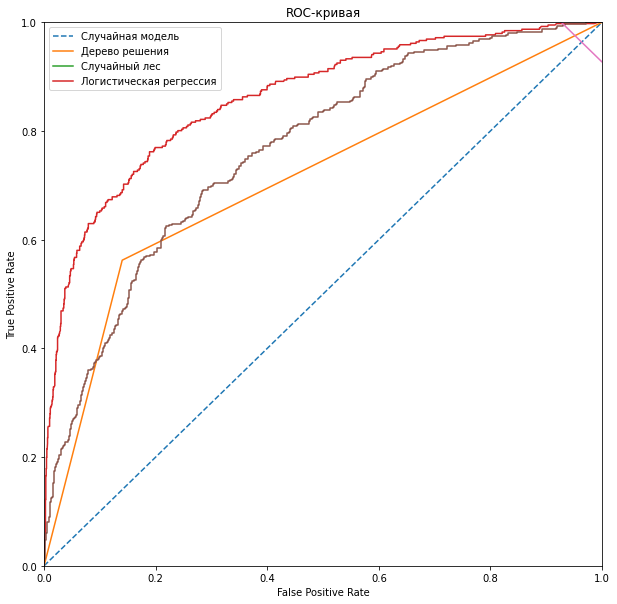

In [ ]:
plt.figure()

plt.figure(figsize=(10,10))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_dec, tpr_dec, thresholds_dec)
plt.plot(fpr_ran, tpr_ran, thresholds_ran)
plt.plot(fpr_log, tpr_log, thresholds_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Дерево решения', 'Случайный лес', 'Логистическая регрессия'), loc= 'upper left') 
plt.show()


## Борьба с дисбалансом

Матрица ошибок

https://practicum.yandex.ru/trainer/data-scientist/lesson/6178662d-4ab1-4510-ae0f-9eddff59e106/task/f84b0d8e-5cb2-4b7c-83d1-1443a65908b2/

In [ ]:
#Матрица ошибок

print(confusion_matrix(target_valid, predictions))

[[1561   53]
 [ 302   84]]


In [ ]:
#Полнота

rew = recall_score(target_valid, predictions)
print(rew)

0.21761658031088082


In [ ]:
#Точность

rew = precision_score(target_valid, predictions)
print(rew)

0.6131386861313869


upsample

https://practicum.yandex.ru/trainer/data-scientist/lesson/b990f044-59b7-42b7-9c82-79b7e9ac3be6/task/851cc0be-4bd3-4669-ab9c-0fe548696a95/

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    #перемешиваем
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

1    5044
0    4739
Name: Exited, dtype: int64


downsample

https://practicum.yandex.ru/trainer/data-scientist/lesson/6c3729c5-d296-4777-8c85-ffcdf84e23ff/task/d1c49d29-7ede-4b72-bb47-6d144e01e33f/

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

1    1261
0    1185
Name: Exited, dtype: int64


**Данных не много не будем пользоваться методом уменьшения downsample**

In [ ]:
for depth in range(1, 50, 1):
    model_d = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=depth)
    model_d.fit(features_upsampled, target_upsampled)
    predicted_valid_d = model_d.predict(features_valid)
    print('Значение - maxdepth:', depth, 'F1:', f1_score(predicted_valid_d, target_valid))

Значение - maxdepth: 1 F1: 0.4863221884498479
Значение - maxdepth: 2 F1: 0.5151811949069539
Значение - maxdepth: 3 F1: 0.5273833671399595
Значение - maxdepth: 4 F1: 0.5210526315789474
Значение - maxdepth: 5 F1: 0.5771428571428572
Значение - maxdepth: 6 F1: 0.5530035335689046
Значение - maxdepth: 7 F1: 0.5764023210831721
Значение - maxdepth: 8 F1: 0.5762004175365345
Значение - maxdepth: 9 F1: 0.5354330708661417
Значение - maxdepth: 10 F1: 0.5261044176706827
Значение - maxdepth: 11 F1: 0.5446527012127894
Значение - maxdepth: 12 F1: 0.5148514851485149
Значение - maxdepth: 13 F1: 0.5231481481481483
Значение - maxdepth: 14 F1: 0.5323910482921084
Значение - maxdepth: 15 F1: 0.5226730310262528
Значение - maxdepth: 16 F1: 0.5237515225334958
Значение - maxdepth: 17 F1: 0.5068322981366459
Значение - maxdepth: 18 F1: 0.5143570536828964
Значение - maxdepth: 19 F1: 0.5267175572519084
Значение - maxdepth: 20 F1: 0.5224071702944942
Значение - maxdepth: 21 F1: 0.5162127107652399
Значение - maxdepth: 2

**Лучшее значение - maxdepth: 7 F1: 0.5764**

In [ ]:
for est in range(1, 22, 2):
	for depth in range (1, 10):
		model_r = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
		model_r.fit(features_upsampled, target_upsampled)
		predicted_valid_r = model_r.predict(features_valid)
		print('Значение - maxdepth:', depth, 'F1:', f1_score(predicted_valid_r, target_valid))
		print('Значение - est:', est, 'F1:', f1_score(predicted_valid_r, target_valid))

Значение - maxdepth: 1 F1: 0.48394004282655245
Значение - est: 1 F1: 0.48394004282655245
Значение - maxdepth: 2 F1: 0.5175257731958763
Значение - est: 1 F1: 0.5175257731958763
Значение - maxdepth: 3 F1: 0.5175257731958763
Значение - est: 1 F1: 0.5175257731958763
Значение - maxdepth: 4 F1: 0.509704641350211
Значение - est: 1 F1: 0.509704641350211
Значение - maxdepth: 5 F1: 0.5736434108527132
Значение - est: 1 F1: 0.5736434108527132
Значение - maxdepth: 6 F1: 0.5583657587548637
Значение - est: 1 F1: 0.5583657587548637
Значение - maxdepth: 7 F1: 0.5688622754491018
Значение - est: 1 F1: 0.5688622754491018
Значение - maxdepth: 8 F1: 0.5756302521008403
Значение - est: 1 F1: 0.5756302521008403
Значение - maxdepth: 9 F1: 0.5487437185929648
Значение - est: 1 F1: 0.5487437185929648
Значение - maxdepth: 1 F1: 0.48394004282655245
Значение - est: 3 F1: 0.48394004282655245
Значение - maxdepth: 2 F1: 0.5175257731958763
Значение - est: 3 F1: 0.5175257731958763
Значение - maxdepth: 3 F1: 0.524923702950

**Лучшее pначение - maxdepth: 5 F1: 0.5922023182297155**

**Лучшее pначение - est: 13 F1: 0.5922023182297155**

In [ ]:
model_l = LogisticRegression(random_state=RANDOM_SEED, solver='liblinear')
model_l.fit(features_upsampled, target_upsampled)
predicted_valid_l = model_l.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_l))

F1: 0.48239436619718307


In [ ]:
probabilities_valid = model_d.predict_proba(features_valid)
probabilities_one_valid_d = probabilities_valid[:, 1]

fpr_dec, tpr_dec, thresholds_dec = roc_curve(target_valid, probabilities_one_valid_d)

aucroc_dec=roc_auc_score(target_valid, probabilities_one_valid_d)
print('Значение:', aucroc_dec)

Значение: 0.7024882665279838


In [ ]:
predicted_valid_r = model_r.predict_proba(features_valid)
probabilities_one_valid_r = predicted_valid_r[:, 1]

fpr_ran, tpr_ran, thresholds_ran = roc_curve(target_valid, probabilities_one_valid_r)

aucroc_ran=roc_auc_score(target_valid, probabilities_one_valid_r)
print('Значение:', aucroc_ran)

Значение: 0.8487008109097213


In [ ]:
probabilities_valid_log = model_l.predict_proba(features_valid)
probabilities_one_valid_l = probabilities_valid_log[:, 1]

fpr_log, tpr_log, thresholds_log = roc_curve(target_valid, probabilities_one_valid_l)

aucroc_log=roc_auc_score(target_valid, probabilities_one_valid_l)
print('Значение:', aucroc_log)

Значение: 0.7719950433705081


<Figure size 432x288 with 0 Axes>

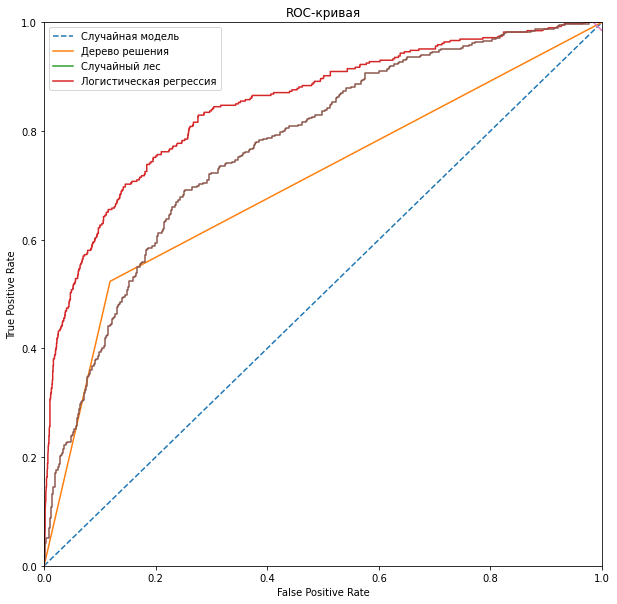

In [ ]:
plt.figure()

plt.figure(figsize=(10,10))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_dec, tpr_dec, thresholds_dec)
plt.plot(fpr_ran, tpr_ran, thresholds_ran)
plt.plot(fpr_log, tpr_log, thresholds_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Дерево решения', 'Случайный лес', 'Логистическая регрессия'), loc= 'upper left') 
plt.show()

## Тестирование модели

К тесту применим модель случайного леса

In [ ]:
model = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))

Случайный лес
Точность попадания по классам 0.867
Precision 0.7279411764705882
Recall 0.5076923076923077
F1 0.5981873111782476


**F1 0.5981873111782476**

In [ ]:
model = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов 0')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))

Случайный лес - уменьшенное количество классов 0
Точность попадания по классам 0.771
Precision 0.44785276073619634
Recall 0.7487179487179487
F1 0.5604606525911708


**F1 0.5604606525911708**

In [ ]:
model = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - увеличенное количество классов 1')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))

Случайный лес - увеличенное количество классов 1
Точность попадания по классам 0.806
Precision 0.5018115942028986
Recall 0.7102564102564103
F1 0.5881104033970276


**F1 0.5881104033970276**

AUC-ROC RandomForestClassifier - дисбаланс 0.856414237935977
AUC-ROC RandomForestClassifier - уменьшение 0.8460670488931359
AUC-ROC RandomForestClassifier - рост 0.842778308647874


<Figure size 432x288 with 0 Axes>

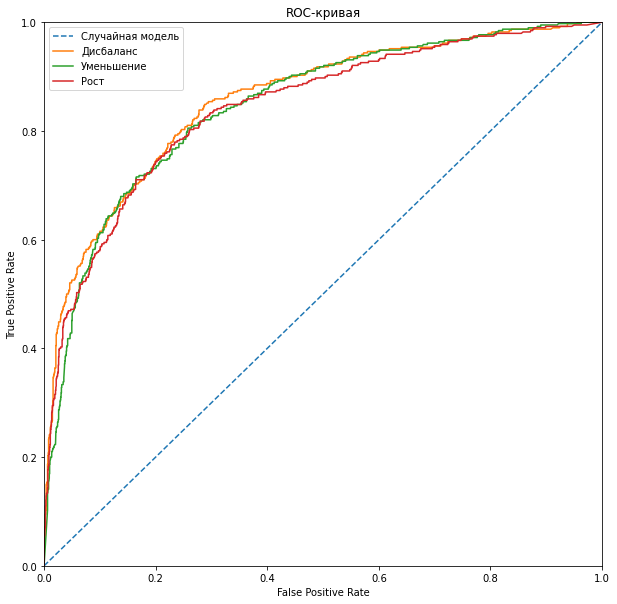

In [ ]:
plt.figure()

plt.figure(figsize=(10,10))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], linestyle='--')


model = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - дисбаланс', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - дисбаланс')


model = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - уменьшение', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - уменьшение')


model = RandomForestClassifier(random_state=RANDOM_SEED, max_features=None, n_estimators=est, max_depth=depth)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - рост', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - рост')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Дисбаланс', 'Уменьшение', 'Рост'), loc= 'upper left') 
plt.show()

**Общий Вывод:** 

Мы подготовили данные, удалили неактуальные столбцы, заменили отсутствующие значения. Провели исследование и получили результаты:

**DecisionTreeClassifier**

Лучшее значение - maxdepth: 5 F1: 0.594

**RandomForestClassifier**

Лучшее значение - maxdepth: 9 F1: 0.6108527131782946

Лучшее значение - est: 21 F1: 0.6108527131782946

**LogisticRegression**

F1: 0.4918872758326216

**Провели работу над дисбалансом и получили:**

Лучшее значение: 0.8514500753089482

**На тестовой выборке**

Лучше значение 


Вывод: RandomForestClassifier является лучшей моделью среди рассмотренных 
